In [1]:
import numpy as np
np.random.seed(1)

In [2]:
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
# 3 by 1 matrix
W = 2*np.random.random((3,1)) - 1
b = 0

In [6]:
#linear step
z = X.dot(W) + b

In [8]:
#nonlinear step
A = sigmoid(z)

In [10]:
print(A)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


In [11]:
#define the loss function
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss 

In [12]:
bce_loss(y,A)

0.8223225820877986

In [13]:
# Randomly initialize the weights
W = 2*np.random.random((3,1)) - 1
b = 0

# Set the learning rate alpha to 1
alpha = 1

# We will train for 20 epochs
epochs = 20

# Count the number of training examples we have (4)
N = y.shape[0]

In [14]:
losses = []
for i in range(epochs):
    # Do the linear step
    z = X.dot(W) + b
    
    # Do the non linear step
    A = sigmoid(z)
    
    # Calculate the loss
    loss = bce_loss(y,A)
    
    # Keep track of the loss
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    # Back propagate
    dz = (A - y)
    
    # ... calcualte loss derivative with respect to weights
    dW = 1/N * np.dot(X.T,dz)
    
    # ... calculate loss derivative with respect to bias
    db = 1/N * np.sum(dz,axis=0,keepdims=True)    
    
    # Update parameters
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.8907627075279007
Epoch: 1 Loss: 0.6927760160745733
Epoch: 2 Loss: 0.5898451770659854
Epoch: 3 Loss: 0.5280885451830415
Epoch: 4 Loss: 0.4820073214455976
Epoch: 5 Loss: 0.44368423755499686
Epoch: 6 Loss: 0.41060585370411384
Epoch: 7 Loss: 0.38165051378604337
Epoch: 8 Loss: 0.3561084424371502
Epoch: 9 Loss: 0.3334450250738084
Epoch: 10 Loss: 0.31323197922576923
Epoch: 11 Loss: 0.29511860660977185
Epoch: 12 Loss: 0.2788147565057779
Epoch: 13 Loss: 0.26407867672883883
Epoch: 14 Loss: 0.2507077275683651
Epoch: 15 Loss: 0.23853110552406673
Epoch: 16 Loss: 0.2274040783772286
Epoch: 17 Loss: 0.21720338508576542
Epoch: 18 Loss: 0.20782354315100746
Epoch: 19 Loss: 0.19917386778993895


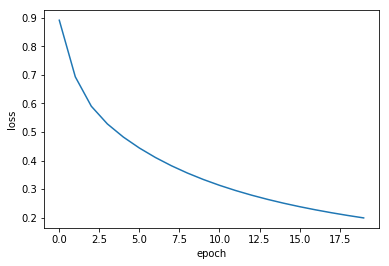

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#fig.savefig('loss.jpg')

# Keras

In [145]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python import keras
import numpy as np
import math
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.python.keras.layers.core import Lambda
from tensorflow.python.keras.optimizers import RMSprop
from keras import backend as K

In [91]:
from sklearn import datasets,svm, pipeline, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import (RBFSampler, Nystroem)
mnist_data = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

In [92]:
print(mnist_data.data.shape)
print(mnist_data.target.shape)

(70000, 784)
(70000,)


In [157]:
X = mnist_data.data
y = mnist_data.target

In [158]:
X = X.reshape((70000,28,28,1))

In [159]:
X = X/255

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

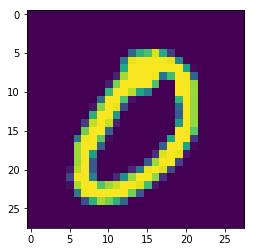

In [161]:
plt.imshow(X[250,:,:,0]);

In [162]:
X_train.shape

(56000, 28, 28, 1)

In [139]:
model = Sequential()

#hidden layers
model.add(Dense(1200, activation='relu', input_shape=(784,)))
model.add(Dense(1200, activation='relu', input_shape=(784,)))
#output layer
model.add(Dense(10, activation='softmax'))

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1200)              942000    
_________________________________________________________________
dense_45 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dense_46 (Dense)             (None, 10)                12010     
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
_________________________________________________________________


In [142]:
for l in model.layers:
    print(l.name, l.input_shape,'==>',l.output_shape)
print
print(model.summary())

dense_44 (None, 784) ==> (None, 1200)
dense_45 (None, 1200) ==> (None, 1200)
dense_46 (None, 1200) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1200)              942000    
_________________________________________________________________
dense_45 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dense_46 (Dense)             (None, 10)                12010     
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
_________________________________________________________________
None


In [152]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 442us/step - loss: 0.2135 - acc: 0.9344 - val_loss: 0.1055 - val_acc: 0.9677
Epoch 2/5
60000/60000 [==============================] - 27s 442us/step - loss: 0.0812 - acc: 0.9761 - val_loss: 0.0719 - val_acc: 0.9780
Epoch 3/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.0561 - acc: 0.9838 - val_loss: 0.0852 - val_acc: 0.9780
Epoch 4/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.0425 - acc: 0.9878 - val_loss: 0.0880 - val_acc: 0.9805
Epoch 5/5
60000/60000 [==============================] - 27s 445us/step - loss: 0.0351 - acc: 0.9901 - val_loss: 0.0980 - val_acc: 0.9799
Test loss: 0.098
Test accuracy: 0.98


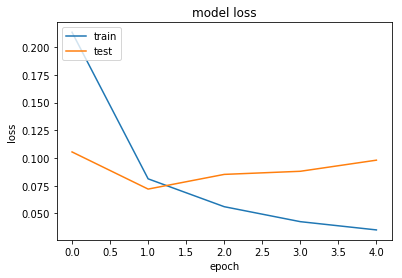

In [154]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print
print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [163]:
# Model
# Logistic Regression Best Model Ever
model = Sequential()
#model.add(Flatten(input_shape=(28, 28, 1)))
#model.add(Dense(10, activation='softmax'))

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [164]:
train_model = model.fit(X_train, Y_train,
                  batch_size=128,
                  epochs=5,
                  verbose=1,
                  validation_data=(X_test, Y_test))

Train on 56000 samples, validate on 14000 samples
Epoch 1/5
56000/56000 [==============================] - 33s 596us/step - loss: 0.2113 - acc: 0.9365 - val_loss: 0.0947 - val_acc: 0.9716
Epoch 2/5
56000/56000 [==============================] - 32s 571us/step - loss: 0.0804 - acc: 0.9761 - val_loss: 0.0648 - val_acc: 0.9801
Epoch 3/5
56000/56000 [==============================] - 32s 577us/step - loss: 0.0569 - acc: 0.9821 - val_loss: 0.0670 - val_acc: 0.9782
Epoch 4/5
56000/56000 [==============================] - 34s 602us/step - loss: 0.0439 - acc: 0.9862 - val_loss: 0.0528 - val_acc: 0.9839
Epoch 5/5
56000/56000 [==============================] - 33s 595us/step - loss: 0.0363 - acc: 0.9884 - val_loss: 0.0503 - val_acc: 0.9837


In [165]:
for l in model.layers:
    print(l.name, l.input_shape,'==>',l.output_shape)
print
print(model.summary())


conv2d_13 (None, 28, 28, 1) ==> (None, 26, 26, 32)
max_pooling2d_10 (None, 26, 26, 32) ==> (None, 13, 13, 32)
dropout_5 (None, 13, 13, 32) ==> (None, 13, 13, 32)
flatten_9 (None, 13, 13, 32) ==> (None, 5408)
dense_49 (None, 5408) ==> (None, 128)
dense_50 (None, 128) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               692

Test loss: 0.05
Test accuracy: 0.984


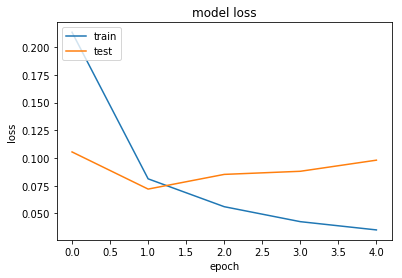

In [167]:
score = model.evaluate(X_test, Y_test, verbose=100)
print
print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')